In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [3]:
bike_df = pd.read_csv('202207-citbike-tripdata.csv')

In [4]:
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C09E4093905089BD,classic_bike,2022-07-23 11:34:57,2022-07-23 11:45:08,Melrose St & Broadway,4801.04,Myrtle Ave & Grove St,4816.05,40.697481,-73.935877,40.699050,-73.915160,member
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member
2,4F73CA25880A1215,electric_bike,2022-07-16 16:30:58,2022-07-16 17:39:18,W 37 St & 10 Ave,6611.02,Knickerbocker Ave & Cooper St,4582.05,40.756604,-73.997901,40.690810,-73.904480,member
3,ECD6EE19C0CC1D31,electric_bike,2022-07-17 17:35:57,2022-07-17 18:03:36,W 37 St & 10 Ave,6611.02,6 Ave & Broome St,5610.09,40.756604,-73.997901,40.724310,-74.004730,member
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member


### Warm up questions

#### 1. Using the start time and end time, compute the duration of each ride in minutes and plot the histogram of ride durations.

In [5]:
bike_df['duration'] = pd.to_datetime(bike_df['ended_at']) - pd.to_datetime(bike_df['started_at'])

In [6]:
bike_df['duration'].head()

0   00:10:11
1   00:07:42
2   01:08:20
3   00:27:39
4   00:02:46
Name: duration, dtype: timedelta64[ns]

In [7]:
bike_df['duration_min'] = bike_df['duration'].apply(lambda x: x/np.timedelta64(1,'m'))

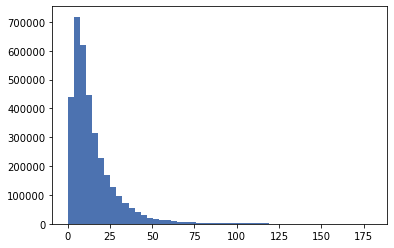

In [8]:
plt.hist(bike_df['duration_min'], range = [0,180], bins = 50)
plt.show()

In [9]:
# eliminate rides more than 3 hours
bike_df = bike_df[bike_df['duration_min'] <= 180]

In [10]:
# eliminate rides with negative duration
bike_df = bike_df[bike_df['duration_min'] >= 0]

2. What is the expected ride duration (i.e., the average ride duration)? What is the empirical variance of ride duration? What is the probability that a ride duration is greater than 20 min?

In [11]:
# calculate expected ride duration
expected_duration = np.mean(bike_df['duration_min'])
print(expected_duration)

14.993813519267052


In [12]:
# calculate empirical variance of ride duration
variance_duration = np.var(bike_df['duration_min'])
print(variance_duration)

232.83281174596056


In [13]:
prob_greater_20 = len(bike_df[bike_df['duration_min']>=20])/len(bike_df['duration_min'])
print(prob_greater_20)

0.23301310224121588


3. What is the probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member? Note that the last column gives whether the ride is for a casual client or a CitiBike member.

In [14]:
prob_greater_20_citi = len(bike_df[(bike_df['duration_min']>=20) & (bike_df['member_casual']=='member')])/len(bike_df[bike_df['member_casual'] == 'member'])
print(prob_greater_20_citi)

0.1863453328048683


In [15]:
bike_df['member_casual'][:]=='member'

0           True
1           True
2           True
3           True
4           True
           ...  
3497385    False
3497386     True
3497387     True
3497388     True
3497389     True
Name: member_casual, Length: 3484671, dtype: bool

4. Suppose that the duration of some ride is more than 25min. What is the probability that this ride belongs to a CitiBike member?

In [16]:
prob_greater_25_belongsCiti = len(bike_df[(bike_df['duration_min']>=25) & (bike_df['member_casual']=='member')])/len(bike_df[bike_df['duration_min'] >= 25])
print(prob_greater_25_belongsCiti)

0.5840322852945297


5. What is the expected ride duration of an electric bike? What is the expected ride duration of a classic bike?

In [17]:
expected_duration_eletric = np.mean(bike_df[bike_df['rideable_type']=='electric_bike']['duration_min'])
print(expected_duration_eletric)

15.170728448189486


In [18]:
expected_duration_classic = np.mean(bike_df[bike_df['rideable_type']=='classic_bike']['duration_min'])
print(expected_duration_classic)

14.731529263276226


6. Suppose that the duration of some ride is less than 10min. What is the probability that this ride uses an electric bike? What is the probability that this ride uses a classic bike? Comment on the results.

In [19]:
prob_less_10_belongsElectirc = len(bike_df[(bike_df['duration_min']<10) & (bike_df['rideable_type']=='electric_bike')])/len(bike_df[bike_df['duration_min'] < 10])
print(prob_less_10_belongsElectirc)

0.23379223076630087


In [20]:
prob_less_10_belongsClassic = len(bike_df[(bike_df['duration_min']<10) & (bike_df['rideable_type']=='classic_bike')])/len(bike_df[bike_df['duration_min'] < 10])
print(prob_less_10_belongsClassic)

0.7634756659010651


## Project Starts Here!

In [21]:
pd.set_option('max_rows', 99999)

In [24]:
location_count = bike_df.groupby('start_station_name').count()['ride_id']

In [25]:
location_count.sort_values(ascending=False).head()

start_station_name
West St & Chambers St    15830
W 21 St & 6 Ave          13492
Broadway & W 58 St       12744
Broadway & E 14 St       12645
6 Ave & W 33 St          12596
Name: ride_id, dtype: int64

In [26]:
# pick most busy 3 stations
top_stations = ['Broadway & W 25 St', 'Central Park S & 6 Ave', 'Broadway & E 21 St']

In [27]:
#change time from string to datetime
bike_df['ended_at_time'] = pd.to_datetime(bike_df['ended_at'])
bike_df['started_at_time'] = pd.to_datetime(bike_df['started_at'])

In [28]:
#keep only hours from 7am-11pm
bike_df = bike_df[(bike_df['started_at_time'].dt.hour >= 7) & (bike_df['started_at_time'].dt.hour <= 23)]

In [29]:
bike_df['morning'] = np.where(bike_df['started_at_time'].dt.hour <= 15,1,0)

In [30]:
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
0,C09E4093905089BD,classic_bike,2022-07-23 11:34:57,2022-07-23 11:45:08,Melrose St & Broadway,4801.04,Myrtle Ave & Grove St,4816.05,40.697481,-73.935877,40.699050,-73.915160,member,00:10:11,10.183333,2022-07-23 11:45:08,2022-07-23 11:34:57,1
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member,00:07:42,7.700000,2022-07-29 18:26:50,2022-07-29 18:19:08,0
2,4F73CA25880A1215,electric_bike,2022-07-16 16:30:58,2022-07-16 17:39:18,W 37 St & 10 Ave,6611.02,Knickerbocker Ave & Cooper St,4582.05,40.756604,-73.997901,40.690810,-73.904480,member,01:08:20,68.333333,2022-07-16 17:39:18,2022-07-16 16:30:58,0
3,ECD6EE19C0CC1D31,electric_bike,2022-07-17 17:35:57,2022-07-17 18:03:36,W 37 St & 10 Ave,6611.02,6 Ave & Broome St,5610.09,40.756604,-73.997901,40.724310,-74.004730,member,00:27:39,27.650000,2022-07-17 18:03:36,2022-07-17 17:35:57,0
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member,00:02:46,2.766667,2022-07-11 07:59:15,2022-07-11 07:56:29,1


In [31]:
bike_df = bike_df[bike_df['started_at_time'].dt.dayofweek < 5]

In [32]:
# get data for morning
bike_df_morning = bike_df[bike_df['morning']==1]
bike_df_morning.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member,00:02:46,2.766667,2022-07-11 07:59:15,2022-07-11 07:56:29,1
13,A178013F1F884220,classic_bike,2022-07-07 15:05:14,2022-07-07 15:11:57,35 St & Broadway,6750.16,38 St & 30 Ave,6850.01,40.760339,-73.922243,40.764175,-73.915840,member,00:06:43,6.716667,2022-07-07 15:11:57,2022-07-07 15:05:14,1
14,0D2CDEECA15D682E,classic_bike,2022-07-18 13:42:01,2022-07-18 14:05:00,35 St & Broadway,6750.16,38 St & 30 Ave,6850.01,40.760339,-73.922243,40.764175,-73.915840,member,00:22:59,22.983333,2022-07-18 14:05:00,2022-07-18 13:42:01,1
16,0B4168237A91DCFA,classic_bike,2022-07-15 10:49:49,2022-07-15 10:55:03,Perry St & Bleecker St,5922.07,6 Ave & Broome St,5610.09,40.735418,-74.004157,40.724310,-74.004730,member,00:05:14,5.233333,2022-07-15 10:55:03,2022-07-15 10:49:49,1
17,6B349D1231B989CB,electric_bike,2022-07-04 11:30:41,2022-07-04 11:45:24,Steinway St & 19 Ave,7220.01,38 St & 30 Ave,6850.01,40.778089,-73.899558,40.764175,-73.915840,casual,00:14:43,14.716667,2022-07-04 11:45:24,2022-07-04 11:30:41,1


In [33]:
# keep only top 3 locations for morning
bike_df_morning_top = bike_df_morning[(bike_df_morning['start_station_name'].isin(top_stations)) | (bike_df_morning['end_station_name'].isin(top_stations))]
bike_df_morning_top.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
562,A4B16A26E9053FB6,classic_bike,2022-07-12 08:02:25,2022-07-12 08:31:37,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765961,-73.976360,40.792255,-73.952499,member,00:29:12,29.200000,2022-07-12 08:31:37,2022-07-12 08:02:25,1
1015,F6EBD13F53062F82,electric_bike,2022-07-21 07:42:01,2022-07-21 07:53:18,Broadway & E 21 St,6098.1,Madison Av & E 51 St,6659.09,40.739888,-73.989586,40.758630,-73.975130,member,00:11:17,11.283333,2022-07-21 07:53:18,2022-07-21 07:42:01,1
1025,96D496A7B7B73CA3,classic_bike,2022-07-13 15:12:00,2022-07-13 15:38:52,Central Park S & 6 Ave,6876.04,1 Ave & E 94 St,7286.05,40.765909,-73.976342,40.781721,-73.945940,member,00:26:52,26.866667,2022-07-13 15:38:52,2022-07-13 15:12:00,1
1043,5FF0753D952AF4B0,classic_bike,2022-07-05 13:55:43,2022-07-05 14:12:36,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765903,-73.976377,40.794165,-73.974124,member,00:16:53,16.883333,2022-07-05 14:12:36,2022-07-05 13:55:43,1
1723,622DCA0E4208014A,classic_bike,2022-07-12 08:20:30,2022-07-12 08:26:40,Broadway & E 21 St,6098.1,E 35 St & Madison Ave,6398.08,40.739888,-73.989586,40.748480,-73.982556,member,00:06:10,6.166667,2022-07-12 08:26:40,2022-07-12 08:20:30,1


In [34]:
# get data for evening
bike_df_evening = bike_df[bike_df['morning']==0]
bike_df_evening.head()
# keep only top 3 locations for evening
bike_df_evening_top = bike_df_evening[(bike_df_evening['start_station_name'].isin(top_stations)) | (bike_df_evening['end_station_name'].isin(top_stations))]
bike_df_evening_top.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
463,2B5D07B9DF571C4D,classic_bike,2022-07-08 17:40:05,2022-07-08 17:45:16,Broadway & E 21 St,6098.1,E 25 St & 2 Ave,6046.02,40.739888,-73.989586,40.739126,-73.979738,member,00:05:11,5.183333,2022-07-08 17:45:16,2022-07-08 17:40:05,0
523,E6A71C538B7E11B5,classic_bike,2022-07-14 17:43:53,2022-07-14 17:59:43,Broadway & E 21 St,6098.1,E 6 St & Avenue D,5506.14,40.739888,-73.989586,40.722281,-73.976687,member,00:15:50,15.833333,2022-07-14 17:59:43,2022-07-14 17:43:53,0
524,869B1A4F043A2243,electric_bike,2022-07-26 19:40:37,2022-07-26 19:50:42,Broadway & E 21 St,6098.1,E 10 St & Avenue A,5659.05,40.739888,-73.989586,40.727408,-73.981420,member,00:10:05,10.083333,2022-07-26 19:50:42,2022-07-26 19:40:37,0
532,A6ED42B2CE3D88D0,classic_bike,2022-07-21 17:31:58,2022-07-21 17:43:14,Broadway & E 21 St,6098.1,E 10 St & Avenue A,5659.05,40.739888,-73.989586,40.727408,-73.981420,member,00:11:16,11.266667,2022-07-21 17:43:14,2022-07-21 17:31:58,0
533,D5C3128C18C4E40B,electric_bike,2022-07-12 19:28:14,2022-07-12 19:50:22,Central Park S & 6 Ave,6876.04,E 10 St & Avenue A,5659.05,40.765909,-73.976342,40.727408,-73.981420,member,00:22:08,22.133333,2022-07-12 19:50:22,2022-07-12 19:28:14,0


In [35]:
# Model for central park morning
bike_df_morning_centralPark = bike_df_morning_top[(bike_df_morning['start_station_name']=='Central Park S & 6 Ave')|(bike_df_morning['end_station_name']=='Central Park S & 6 Ave')]
bike_df_morning_centralPark.head()

<ipython-input-35-b14a28b1795d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bike_df_morning_centralPark = bike_df_morning_top[(bike_df_morning['start_station_name']=='Central Park S & 6 Ave')|(bike_df_morning['end_station_name']=='Central Park S & 6 Ave')]


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning
562,A4B16A26E9053FB6,classic_bike,2022-07-12 08:02:25,2022-07-12 08:31:37,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765961,-73.976360,40.792255,-73.952499,member,00:29:12,29.200000,2022-07-12 08:31:37,2022-07-12 08:02:25,1
1025,96D496A7B7B73CA3,classic_bike,2022-07-13 15:12:00,2022-07-13 15:38:52,Central Park S & 6 Ave,6876.04,1 Ave & E 94 St,7286.05,40.765909,-73.976342,40.781721,-73.945940,member,00:26:52,26.866667,2022-07-13 15:38:52,2022-07-13 15:12:00,1
1043,5FF0753D952AF4B0,classic_bike,2022-07-05 13:55:43,2022-07-05 14:12:36,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765903,-73.976377,40.794165,-73.974124,member,00:16:53,16.883333,2022-07-05 14:12:36,2022-07-05 13:55:43,1
1731,CDBEEDAD40546EA2,classic_bike,2022-07-06 13:59:30,2022-07-06 14:15:55,Central Park S & 6 Ave,6876.04,1 Ave & E 78 St,7020.09,40.765909,-73.976342,40.771404,-73.953517,member,00:16:25,16.416667,2022-07-06 14:15:55,2022-07-06 13:59:30,1
3242,CF3C09E086CF7332,classic_bike,2022-07-15 11:11:14,2022-07-15 11:32:21,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765909,-73.976342,40.792255,-73.952499,casual,00:21:07,21.116667,2022-07-15 11:32:21,2022-07-15 11:11:14,1


In [36]:
len(bike_df_morning_centralPark)

6386

In [37]:
# Extract start time from the date
bike_df_morning_centralPark['start_time'] = bike_df_morning_centralPark['started_at'].apply(lambda x: x.split()[1])

<ipython-input-37-8370ace417f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_morning_centralPark['start_time'] = bike_df_morning_centralPark['started_at'].apply(lambda x: x.split()[1])


In [38]:
# Extract end time from the date
bike_df_morning_centralPark['end_time'] = bike_df_morning_centralPark['ended_at'].apply(lambda x: x.split()[1])

<ipython-input-38-2588b73051b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_morning_centralPark['end_time'] = bike_df_morning_centralPark['ended_at'].apply(lambda x: x.split()[1])


In [39]:
# Extract date from the date
bike_df_morning_centralPark['end_date'] = bike_df_morning_centralPark['ended_at'].apply(lambda x: x.split()[0])

<ipython-input-39-84ce6a52075a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_morning_centralPark['end_date'] = bike_df_morning_centralPark['ended_at'].apply(lambda x: x.split()[0])


In [40]:
bike_df_morning_centralPark.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning,start_time,end_time,end_date
562,A4B16A26E9053FB6,classic_bike,2022-07-12 08:02:25,2022-07-12 08:31:37,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765961,-73.976360,...,-73.952499,member,00:29:12,29.200000,2022-07-12 08:31:37,2022-07-12 08:02:25,1,08:02:25,08:31:37,2022-07-12
1025,96D496A7B7B73CA3,classic_bike,2022-07-13 15:12:00,2022-07-13 15:38:52,Central Park S & 6 Ave,6876.04,1 Ave & E 94 St,7286.05,40.765909,-73.976342,...,-73.945940,member,00:26:52,26.866667,2022-07-13 15:38:52,2022-07-13 15:12:00,1,15:12:00,15:38:52,2022-07-13
1043,5FF0753D952AF4B0,classic_bike,2022-07-05 13:55:43,2022-07-05 14:12:36,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765903,-73.976377,...,-73.974124,member,00:16:53,16.883333,2022-07-05 14:12:36,2022-07-05 13:55:43,1,13:55:43,14:12:36,2022-07-05
1731,CDBEEDAD40546EA2,classic_bike,2022-07-06 13:59:30,2022-07-06 14:15:55,Central Park S & 6 Ave,6876.04,1 Ave & E 78 St,7020.09,40.765909,-73.976342,...,-73.953517,member,00:16:25,16.416667,2022-07-06 14:15:55,2022-07-06 13:59:30,1,13:59:30,14:15:55,2022-07-06
3242,CF3C09E086CF7332,classic_bike,2022-07-15 11:11:14,2022-07-15 11:32:21,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765909,-73.976342,...,-73.952499,casual,00:21:07,21.116667,2022-07-15 11:32:21,2022-07-15 11:11:14,1,11:11:14,11:32:21,2022-07-15


In [41]:
# Model for central park evening
bike_df_evening_centralPark = bike_df_evening_top[(bike_df_evening['start_station_name']=='Central Park S & 6 Ave')|(bike_df_evening['end_station_name']=='Central Park S & 6 Ave')]
bike_df_evening_centralPark.head()
# Extract start time from the date
bike_df_evening_centralPark['start_time'] = bike_df_evening_centralPark['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_evening_centralPark['end_time'] = bike_df_evening_centralPark['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_evening_centralPark['end_date'] = bike_df_evening_centralPark['ended_at'].apply(lambda x: x.split()[0])
bike_df_evening_centralPark.head()

<ipython-input-41-c8b32db9f77b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bike_df_evening_centralPark = bike_df_evening_top[(bike_df_evening['start_station_name']=='Central Park S & 6 Ave')|(bike_df_evening['end_station_name']=='Central Park S & 6 Ave')]
<ipython-input-41-c8b32db9f77b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_evening_centralPark['start_time'] = bike_df_evening_centralPark['started_at'].apply(lambda x: x.split()[1])
<ipython-input-41-c8b32db9f77b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,duration_min,ended_at_time,started_at_time,morning,start_time,end_time,end_date
533,D5C3128C18C4E40B,electric_bike,2022-07-12 19:28:14,2022-07-12 19:50:22,Central Park S & 6 Ave,6876.04,E 10 St & Avenue A,5659.05,40.765909,-73.976342,...,-73.981420,member,00:22:08,22.133333,2022-07-12 19:50:22,2022-07-12 19:28:14,0,19:28:14,19:50:22,2022-07-12
567,132BC0B6E09227E9,classic_bike,2022-07-11 16:33:42,2022-07-11 16:54:53,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765968,-73.976469,...,-73.952499,casual,00:21:11,21.183333,2022-07-11 16:54:53,2022-07-11 16:33:42,0,16:33:42,16:54:53,2022-07-11
568,8D0244C997213408,electric_bike,2022-07-21 18:12:15,2022-07-21 18:30:04,Central Park S & 6 Ave,6876.04,5 Ave & E 103 St,7511.19,40.765909,-73.976342,...,-73.952499,member,00:17:49,17.816667,2022-07-21 18:30:04,2022-07-21 18:12:15,0,18:12:15,18:30:04,2022-07-21
713,7AE30089E6D1FC89,electric_bike,2022-07-04 23:47:47,2022-07-04 23:59:49,Central Park S & 6 Ave,6876.04,West End Ave & W 94 St,7524.09,40.765909,-73.976342,...,-73.974124,member,00:12:02,12.033333,2022-07-04 23:59:49,2022-07-04 23:47:47,0,23:47:47,23:59:49,2022-07-04
1722,05CF103C9C7E412A,electric_bike,2022-07-01 19:39:15,2022-07-01 19:52:08,Central Park S & 6 Ave,6876.04,1 Ave & E 78 St,7020.09,40.765909,-73.976342,...,-73.953517,member,00:12:53,12.883333,2022-07-01 19:52:08,2022-07-01 19:39:15,0,19:39:15,19:52:08,2022-07-01


In [43]:
# build 48 time frames for evening
evening_time = pd.date_range('15:00:00', '23:00:00',freq= "10min")
evening_time = [str(x).split()[1] for x in evening_time]

In [44]:
# build 48 time frames for morning
morning_time = pd.date_range('07:00:00', '15:00:00',freq= "10min")
morning_time = [str(x).split()[1] for x in morning_time]

In [45]:
#evening_time

In [46]:
len(morning_time)

49

In [47]:
# get unique days in the month
dates = sorted(bike_df_morning_centralPark['end_date'].unique())
dates

['2022-07-01',
 '2022-07-04',
 '2022-07-05',
 '2022-07-06',
 '2022-07-07',
 '2022-07-08',
 '2022-07-11',
 '2022-07-12',
 '2022-07-13',
 '2022-07-14',
 '2022-07-15',
 '2022-07-18',
 '2022-07-19',
 '2022-07-20',
 '2022-07-21',
 '2022-07-22',
 '2022-07-25',
 '2022-07-26',
 '2022-07-27',
 '2022-07-28',
 '2022-07-29']

# This is the experiment approach model

In [48]:
# function for computing net flow
def get_net_flow(time1, time2, station, df):
    net_flow = []
    for n in dates:
      flow = len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['end_station_name'] == station))]) - len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['start_station_name'] == station))])
      net_flow.append(flow)
    return net_flow

In [49]:
# compute probability of each net flow
def get_flow_prob(net_flow):
  net_flow = pd.DataFrame(net_flow)
  net_flow['count'] = range(len(net_flow))
  net_flow_count = net_flow.groupby(0).count()
  net_flow_count['prob'] = net_flow_count['count']/len(net_flow)
  return net_flow_count

In [50]:
# function for get all transition matrix of 48 time slots
def get_all_transition_matrix(time_lst, df, station, num_docks):
  # Get all transition matrix for evening central park station
  p_lst = []
  for index in range(len(time_lst)-1):
    time1 = time_lst[index]
    time2 = time_lst[index+1]
    station = station
    df = df
    net_flow = get_net_flow(time1, time2, station, df)
    # create transition probability matrix for 7:00 to 7:10
    num_docks = num_docks
    new_flow_prob = get_flow_prob(net_flow)
    p1 = [[0 for j in range (num_docks)] for i in range (num_docks)]
    for i in range(num_docks):
        for n in new_flow_prob.index:
          if i+n >=0 and i+n < num_docks:
            p1[i][i+n] = float(new_flow_prob[new_flow_prob.index==n]['prob'])
    p1 = pd.DataFrame(p1)
    #p1 = pd.to_numeric(p1)
    p1 = np.array(p1)
    p_lst.append(p1)
  return p_lst

In [51]:
# function for getting final transition matrix
def get_final_transition_matrix(p_lst):
  # Make all rows in transition matrix equals 1
  for j in range(len(p_lst)):
    for i in range(len(p_lst[j])):
      my_sum = np.sum(p_lst[j][i])
      p_lst[j][i] = [x/my_sum for x in p_lst[j][i]]
  # compute final p matrix by matrix multiplication for evening central park station
  p = p_lst[0]
  for i in range(1,len(p_lst)):
    p = np.matmul(p,p_lst[i])
  p = pd.DataFrame(p)
  return p

In [52]:
# get final probability transition matrix for morning central park
p_lst_morning_central = get_all_transition_matrix(morning_time, bike_df_morning_centralPark, 'Central Park S & 6 Ave', num_docks=20)
p_morning_central = get_final_transition_matrix(p_lst_morning_central)
p_morning_central

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.035303,0.040412,0.049502,0.049501,0.049978,0.050712,0.052375,0.053709,0.055035,0.057092,0.058693,0.059788,0.060778,0.060609,0.057395,0.055110,0.049764,0.042012,0.034548,0.027685
1,0.035279,0.040386,0.049471,0.049473,0.049954,0.050692,0.052359,0.053698,0.055029,0.057091,0.058698,0.059798,0.060794,0.060630,0.057418,0.055136,0.049790,0.042035,0.034567,0.027702
2,0.035252,0.040357,0.049437,0.049443,0.049928,0.050670,0.052341,0.053686,0.055022,0.057091,0.058704,0.059810,0.060812,0.060653,0.057443,0.055164,0.049817,0.042060,0.034589,0.027719
3,0.035228,0.040331,0.049407,0.049415,0.049904,0.050650,0.052325,0.053675,0.055017,0.057090,0.058709,0.059821,0.060829,0.060674,0.057467,0.055190,0.049842,0.042083,0.034608,0.027736
4,0.035207,0.040308,0.049379,0.049391,0.049883,0.050632,0.052310,0.053665,0.055011,0.057090,0.058714,0.059830,0.060843,0.060693,0.057488,0.055212,0.049865,0.042104,0.034626,0.027750
5,0.035188,0.040288,0.049356,0.049370,0.049864,0.050617,0.052298,0.053656,0.055007,0.057090,0.058718,0.059838,0.060856,0.060709,0.057505,0.055232,0.049884,0.042121,0.034641,0.027763
6,0.035173,0.040271,0.049336,0.049352,0.049849,0.050604,0.052288,0.053649,0.055003,0.057089,0.058722,0.059845,0.060866,0.060722,0.057520,0.055248,0.049900,0.042135,0.034653,0.027773
7,0.035161,0.040258,0.049321,0.049338,0.049837,0.050594,0.052280,0.053644,0.055000,0.057089,0.058724,0.059851,0.060874,0.060733,0.057532,0.055261,0.049912,0.042147,0.034663,0.027781
8,0.035151,0.040247,0.049308,0.049327,0.049827,0.050586,0.052273,0.053639,0.054998,0.057089,0.058726,0.059855,0.060881,0.060741,0.057541,0.055271,0.049922,0.042156,0.034671,0.027788
9,0.035144,0.040239,0.049299,0.049319,0.049820,0.050580,0.052268,0.053636,0.054996,0.057089,0.058728,0.059858,0.060886,0.060748,0.057548,0.055279,0.049930,0.042163,0.034677,0.027793


In [53]:
# get final probability transition matrix for evening central park
p_lst_evening_central = get_all_transition_matrix(evening_time, bike_df_evening_centralPark, 'Central Park S & 6 Ave', num_docks=20)
p_evening_central = get_final_transition_matrix(p_lst_evening_central)
p_evening_central

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.070780,0.102481,0.107896,0.096234,0.082970,0.073497,0.066554,0.059492,0.052507,0.046362,0.040965,0.036195,0.031963,0.028230,0.024885,0.021947,0.018614,0.015529,0.012915,0.009982
1,0.070772,0.102470,0.107885,0.096224,0.082963,0.073493,0.066552,0.059492,0.052508,0.046365,0.040969,0.036200,0.031969,0.028236,0.024891,0.021953,0.018620,0.015534,0.012919,0.009985
2,0.070753,0.102443,0.107859,0.096204,0.082949,0.073483,0.066547,0.059491,0.052511,0.046371,0.040978,0.036211,0.031981,0.028249,0.024905,0.021967,0.018632,0.015545,0.012929,0.009993
3,0.070700,0.102369,0.107785,0.096145,0.082907,0.073456,0.066532,0.059489,0.052520,0.046389,0.041003,0.036241,0.032016,0.028286,0.024943,0.022004,0.018667,0.015576,0.012956,0.010015
4,0.070630,0.102269,0.107686,0.096067,0.082852,0.073421,0.066513,0.059485,0.052531,0.046413,0.041037,0.036282,0.032062,0.028335,0.024993,0.022055,0.018714,0.015618,0.012993,0.010044
5,0.070554,0.102162,0.107580,0.095983,0.082793,0.073382,0.066492,0.059482,0.052543,0.046438,0.041073,0.036327,0.032112,0.028388,0.025048,0.022109,0.018764,0.015663,0.013032,0.010075
6,0.070471,0.102044,0.107462,0.095891,0.082728,0.073340,0.066469,0.059478,0.052557,0.046466,0.041113,0.036375,0.032166,0.028447,0.025108,0.022169,0.018819,0.015712,0.013075,0.010110
7,0.070403,0.101948,0.107368,0.095816,0.082676,0.073306,0.066451,0.059475,0.052568,0.046489,0.041145,0.036414,0.032211,0.028494,0.025156,0.022217,0.018864,0.015752,0.013110,0.010137
8,0.070308,0.101814,0.107235,0.095711,0.082602,0.073258,0.066425,0.059470,0.052583,0.046521,0.041190,0.036470,0.032273,0.028561,0.025225,0.022285,0.018927,0.015808,0.013159,0.010177
9,0.070236,0.101711,0.107133,0.095630,0.082545,0.073221,0.066405,0.059467,0.052595,0.046545,0.041224,0.036512,0.032321,0.028612,0.025277,0.022337,0.018975,0.015851,0.013197,0.010207


In [54]:
# Model for 'Broadway & W 25 St' morning
bike_df_morning_broadwayWest = bike_df_morning_top[(bike_df_morning['start_station_name']=='Broadway & W 25 St')|(bike_df_morning['end_station_name']=='Broadway & W 25 St')]
bike_df_morning_broadwayWest.head()
# Extract start time from the date
bike_df_morning_broadwayWest['start_time'] = bike_df_morning_broadwayWest['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_morning_broadwayWest['end_time'] = bike_df_morning_broadwayWest['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_morning_broadwayWest['end_date'] = bike_df_morning_broadwayWest['ended_at'].apply(lambda x: x.split()[0])

<ipython-input-54-8df78ccc1fa5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bike_df_morning_broadwayWest = bike_df_morning_top[(bike_df_morning['start_station_name']=='Broadway & W 25 St')|(bike_df_morning['end_station_name']=='Broadway & W 25 St')]
<ipython-input-54-8df78ccc1fa5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_morning_broadwayWest['start_time'] = bike_df_morning_broadwayWest['started_at'].apply(lambda x: x.split()[1])
<ipython-input-54-8df78ccc1fa5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

In [55]:
# get final probability transition matrix for morning broadwayWest
p_lst_morning_broadwayWest = get_all_transition_matrix(morning_time, bike_df_morning_broadwayWest, 'Broadway & W 25 St', num_docks=20)
p_morning_broadwayWest = get_final_transition_matrix(p_lst_morning_broadwayWest)
p_morning_broadwayWest

<ipython-input-51-35ce7023af8f>:7: RuntimeWarning: invalid value encountered in double_scalars
  p_lst[j][i] = [x/my_sum for x in p_lst[j][i]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Model for broadwayWest evening
bike_df_evening_broadwayWest = bike_df_evening_top[(bike_df_evening['start_station_name']=='Broadway & W 25 St')|(bike_df_evening['end_station_name']=='Broadway & W 25 St')]
bike_df_evening_broadwayWest.head()
# Extract start time from the date
bike_df_evening_broadwayWest['start_time'] = bike_df_evening_broadwayWest['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_evening_broadwayWest['end_time'] = bike_df_evening_broadwayWest['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_evening_broadwayWest['end_date'] = bike_df_evening_broadwayWest['ended_at'].apply(lambda x: x.split()[0])

<ipython-input-56-66ef6bc7fdda>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bike_df_evening_broadwayWest = bike_df_evening_top[(bike_df_evening['start_station_name']=='Broadway & W 25 St')|(bike_df_evening['end_station_name']=='Broadway & W 25 St')]
<ipython-input-56-66ef6bc7fdda>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_evening_broadwayWest['start_time'] = bike_df_evening_broadwayWest['started_at'].apply(lambda x: x.split()[1])
<ipython-input-56-66ef6bc7fdda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

In [57]:
# get final probability transition matrix for evening broadwayWest
p_lst_evening_broadwayWest = get_all_transition_matrix(evening_time, bike_df_evening_broadwayWest, 'Broadway & W 25 St', num_docks=20)
p_evening_broadwayWest = get_final_transition_matrix(p_lst_evening_broadwayWest)
p_evening_broadwayWest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.113808,0.105633,0.106896,0.098150,0.090039,0.080582,0.071331,0.061241,0.051686,0.043254,0.036026,0.029923,0.024859,0.020712,0.017369,0.014687,0.012449,0.010064,0.007181,0.004110
1,0.113807,0.105633,0.106896,0.098149,0.090039,0.080582,0.071331,0.061241,0.051686,0.043255,0.036027,0.029924,0.024859,0.020713,0.017369,0.014687,0.012449,0.010064,0.007181,0.004110
2,0.113807,0.105633,0.106896,0.098149,0.090039,0.080582,0.071331,0.061241,0.051686,0.043255,0.036027,0.029924,0.024859,0.020713,0.017369,0.014687,0.012450,0.010064,0.007182,0.004110
3,0.113806,0.105632,0.106895,0.098149,0.090039,0.080582,0.071331,0.061241,0.051686,0.043255,0.036027,0.029924,0.024859,0.020713,0.017369,0.014687,0.012450,0.010065,0.007182,0.004110
4,0.113805,0.105631,0.106894,0.098148,0.090038,0.080581,0.071331,0.061241,0.051686,0.043255,0.036027,0.029924,0.024860,0.020713,0.017370,0.014688,0.012450,0.010065,0.007182,0.004110
5,0.113804,0.105631,0.106894,0.098147,0.090038,0.080581,0.071330,0.061240,0.051686,0.043255,0.036028,0.029925,0.024860,0.020714,0.017370,0.014688,0.012451,0.010065,0.007182,0.004110
6,0.113803,0.105629,0.106892,0.098146,0.090037,0.080580,0.071330,0.061240,0.051686,0.043256,0.036028,0.029925,0.024861,0.020715,0.017371,0.014689,0.012451,0.010066,0.007183,0.004110
7,0.113801,0.105628,0.106891,0.098145,0.090036,0.080580,0.071330,0.061240,0.051687,0.043256,0.036029,0.029926,0.024862,0.020715,0.017372,0.014690,0.012452,0.010067,0.007183,0.004111
8,0.113798,0.105625,0.106889,0.098143,0.090035,0.080579,0.071329,0.061240,0.051687,0.043257,0.036030,0.029927,0.024863,0.020717,0.017373,0.014691,0.012453,0.010068,0.007184,0.004111
9,0.113796,0.105623,0.106886,0.098141,0.090033,0.080578,0.071329,0.061240,0.051687,0.043258,0.036031,0.029928,0.024864,0.020718,0.017375,0.014693,0.012455,0.010069,0.007185,0.004112


In [58]:
# Model for broadwayEast morning
bike_df_morning_broadwayEast = bike_df_morning_top[(bike_df_morning['start_station_name']=='Broadway & E 21 St')|(bike_df_morning['end_station_name']=='Broadway & E 21 St')]
bike_df_morning_broadwayEast.head()
# Extract start time from the date
bike_df_morning_broadwayEast['start_time'] = bike_df_morning_broadwayEast['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_morning_broadwayEast['end_time'] = bike_df_morning_broadwayEast['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_morning_broadwayEast['end_date'] = bike_df_morning_broadwayEast['ended_at'].apply(lambda x: x.split()[0])

<ipython-input-58-f3715f91c651>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bike_df_morning_broadwayEast = bike_df_morning_top[(bike_df_morning['start_station_name']=='Broadway & E 21 St')|(bike_df_morning['end_station_name']=='Broadway & E 21 St')]
<ipython-input-58-f3715f91c651>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_morning_broadwayEast['start_time'] = bike_df_morning_broadwayEast['started_at'].apply(lambda x: x.split()[1])
<ipython-input-58-f3715f91c651>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

In [59]:
# get final probability transition matrix for morning broadwayEast
p_lst_morning_broadwayEast = get_all_transition_matrix(morning_time, bike_df_morning_broadwayEast, 'Broadway & E 21 St', num_docks=20)
p_morning_broadwayEast = get_final_transition_matrix(p_lst_morning_broadwayEast)
p_morning_broadwayEast

<ipython-input-51-35ce7023af8f>:7: RuntimeWarning: invalid value encountered in double_scalars
  p_lst[j][i] = [x/my_sum for x in p_lst[j][i]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Model for broadwayEast evening
bike_df_evening_broadwayEast = bike_df_evening_top[(bike_df_evening['start_station_name']=='Broadway & E 21 St')|(bike_df_evening['end_station_name']=='Broadway & E 21 St')]
bike_df_evening_broadwayEast.head()
# Extract start time from the date
bike_df_evening_broadwayEast['start_time'] = bike_df_evening_broadwayEast['started_at'].apply(lambda x: x.split()[1])
# Extract end time from the date
bike_df_evening_broadwayEast['end_time'] = bike_df_evening_broadwayEast['ended_at'].apply(lambda x: x.split()[1])
# Extract date from the date
bike_df_evening_broadwayEast['end_date'] = bike_df_evening_broadwayEast['ended_at'].apply(lambda x: x.split()[0])

<ipython-input-60-8b9078594e8f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bike_df_evening_broadwayEast = bike_df_evening_top[(bike_df_evening['start_station_name']=='Broadway & E 21 St')|(bike_df_evening['end_station_name']=='Broadway & E 21 St')]
<ipython-input-60-8b9078594e8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_evening_broadwayEast['start_time'] = bike_df_evening_broadwayEast['started_at'].apply(lambda x: x.split()[1])
<ipython-input-60-8b9078594e8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

In [61]:
# get final probability transition matrix for evening broadwayEast
p_lst_evening_broadwayEast = get_all_transition_matrix(evening_time, bike_df_evening_broadwayEast, 'Broadway & E 21 St', num_docks=20)
p_evening_broadwayEast = get_final_transition_matrix(p_lst_evening_broadwayEast)
p_evening_broadwayEast

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.104497,0.104272,0.098868,0.089372,0.081983,0.074403,0.066600,0.059194,0.052236,0.045924,0.040215,0.035116,0.030578,0.026619,0.023143,0.020145,0.017231,0.013674,0.010204,0.005724
1,0.104490,0.104265,0.098862,0.089366,0.081979,0.074400,0.066599,0.059193,0.052237,0.045926,0.040218,0.035119,0.030582,0.026623,0.023147,0.020149,0.017235,0.013678,0.010207,0.005726
2,0.104482,0.104258,0.098855,0.089361,0.081975,0.074397,0.066597,0.059193,0.052238,0.045928,0.040220,0.035122,0.030586,0.026627,0.023151,0.020153,0.017239,0.013681,0.010209,0.005727
3,0.104477,0.104253,0.098851,0.089358,0.081972,0.074395,0.066596,0.059193,0.052239,0.045929,0.040222,0.035124,0.030588,0.026629,0.023154,0.020156,0.017242,0.013683,0.010211,0.005728
4,0.104468,0.104244,0.098843,0.089351,0.081967,0.074392,0.066594,0.059192,0.052239,0.045931,0.040225,0.035128,0.030592,0.026634,0.023159,0.020161,0.017247,0.013687,0.010214,0.005730
5,0.104455,0.104232,0.098832,0.089343,0.081960,0.074387,0.066592,0.059192,0.052241,0.045934,0.040229,0.035133,0.030598,0.026641,0.023166,0.020167,0.017253,0.013693,0.010219,0.005733
6,0.104439,0.104217,0.098819,0.089332,0.081952,0.074382,0.066588,0.059191,0.052242,0.045937,0.040234,0.035140,0.030606,0.026649,0.023174,0.020176,0.017261,0.013700,0.010224,0.005736
7,0.104421,0.104199,0.098804,0.089319,0.081942,0.074375,0.066585,0.059190,0.052244,0.045941,0.040240,0.035147,0.030615,0.026658,0.023184,0.020186,0.017271,0.013708,0.010230,0.005739
8,0.104402,0.104181,0.098787,0.089306,0.081932,0.074368,0.066581,0.059190,0.052246,0.045946,0.040247,0.035155,0.030624,0.026668,0.023195,0.020196,0.017281,0.013716,0.010237,0.005743
9,0.104380,0.104160,0.098769,0.089291,0.081921,0.074360,0.066577,0.059189,0.052248,0.045951,0.040254,0.035164,0.030634,0.026679,0.023206,0.020208,0.017292,0.013726,0.010244,0.005747


# Our adjusted final model for transition matrices and stationary distribution

In [89]:
# use one matrix to estimate transition matrix
# function for computing net flow
def get_net_flow(time1, time2, station, df):
    net_flow = []
    for n in dates:
      flow = len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['end_station_name'] == station))]) - len(df[(df['start_time'] <= time2) 
                              & (df['start_time'] > time1) 
                              & (df['end_date'] == n)
                              & ((df['start_station_name'] == station))])
      net_flow.append(flow)
    return net_flow

In [90]:
def get_net_flow_lst(time_lst, station, df):
    flow_lst_morning_central = []
    for i in range(len(time_lst)-1):
      time1 = time_lst[i]
      time2 = time_lst[i+1]
      station = station
      df = df
      flow_lst_morning_central = flow_lst_morning_central + get_net_flow(time1, time2, station, df)
    return flow_lst_morning_central

In [91]:
# function for get the transition matrix
def get_transition_matrix(time_lst, df, station, num_docks):
  # Get all transition matrix for evening central park station
    df = df
    time_lst = time_lst
    station = station

    net_flow = get_net_flow_lst(time_lst, station, df)
    # create transition probability matrix for 7:00 to 7:10
    num_docks = num_docks
    new_flow_prob = get_flow_prob(net_flow)
    p1 = [[0 for j in range (num_docks)] for i in range (num_docks)]
    for i in range(num_docks):
        for n in new_flow_prob.index:
          if i+n >=0 and i+n < num_docks:
            p1[i][i+n] = float(new_flow_prob[new_flow_prob.index==n]['prob'])
    p1 = pd.DataFrame(p1)
    #p1 = pd.to_numeric(p1)
    p1 = np.array(p1)
    return p1

In [92]:
# function for getting transition matrix will row sums to 1
def get_transition_matrix_rowsum1(p):
  # Make all rows in transition matrix equals 1
    for i in range(len(p)):
      my_sum = np.sum(p[i])
      p[i] = [x/my_sum for x in p[i]]
    p = pd.DataFrame(p)
    return p

In [93]:
#transition matrix for central park in the morning
centralpark_morning = get_transition_matrix_rowsum1(get_transition_matrix(morning_time, bike_df_morning_centralPark, 'Central Park S & 6 Ave', num_docks=20))
centralpark_morning

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.264798,0.191589,0.227414,0.130841,0.091900,0.032710,0.029595,0.014019,0.007788,0.006231,0.001558,0.001558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.144000,0.226667,0.164000,0.194667,0.112000,0.078667,0.028000,0.025333,0.012000,0.006667,0.005333,0.001333,0.001333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.117647,0.127059,0.200000,0.144706,0.171765,0.098824,0.069412,0.024706,0.022353,0.010588,0.005882,0.004706,0.001176,0.001176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.070022,0.109409,0.118162,0.185996,0.134573,0.159737,0.091904,0.064551,0.022976,0.020788,0.009847,0.005470,0.004376,0.001094,0.001094,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.038906,0.067298,0.105152,0.113565,0.178759,0.129338,0.153523,0.088328,0.062040,0.022082,0.019979,0.009464,0.005258,0.004206,0.001052,0.001052,0.000000,0.000000,0.000000,0.000000
5,0.026612,0.037871,0.065507,0.102354,0.110542,0.174002,0.125896,0.149437,0.085977,0.060389,0.021494,0.019447,0.009212,0.005118,0.004094,0.001024,0.001024,0.000000,0.000000,0.000000
6,0.015121,0.026210,0.037298,0.064516,0.100806,0.108871,0.171371,0.123992,0.147177,0.084677,0.059476,0.021169,0.019153,0.009073,0.005040,0.004032,0.001008,0.001008,0.000000,0.000000
7,0.005015,0.015045,0.026078,0.037111,0.064193,0.100301,0.108325,0.170512,0.123370,0.146439,0.084253,0.059178,0.021063,0.019057,0.009027,0.005015,0.004012,0.001003,0.001003,0.000000
8,0.007960,0.004975,0.014925,0.025871,0.036816,0.063682,0.099502,0.107463,0.169154,0.122388,0.145274,0.083582,0.058706,0.020896,0.018905,0.008955,0.004975,0.003980,0.000995,0.000995
9,0.001988,0.007952,0.004970,0.014911,0.025845,0.036779,0.063618,0.099404,0.107356,0.168986,0.122266,0.145129,0.083499,0.058648,0.020875,0.018887,0.008946,0.004970,0.003976,0.000994


In [123]:
#stationary distribution of central park in the morning and its histogram
centralpark_morning=np.asarray(centralpark_morning)
transition_matrix_transp = centralpark_morning.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
centralpark_morning_Pi = target_eigenvect / sum(target_eigenvect) 
centralpark_morning_Pi=(centralpark_morning_Pi).real
centralpark_morning_Pi

array([0.01655252, 0.02118966, 0.0268009 , 0.03117026, 0.03518968,
       0.03836724, 0.04163658, 0.04476026, 0.04796602, 0.05133575,
       0.05474482, 0.05830665, 0.06138834, 0.06520396, 0.06825817,
       0.07046922, 0.0719847 , 0.07062066, 0.06534754, 0.05870707])

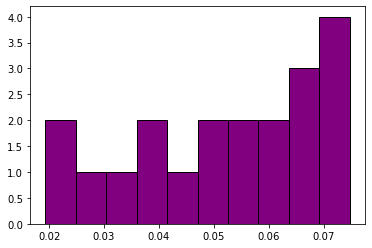

In [124]:
plt.hist(centralpark_morning_Pi, bins=10, align='right', color='purple', edgecolor='black')
plt.show()

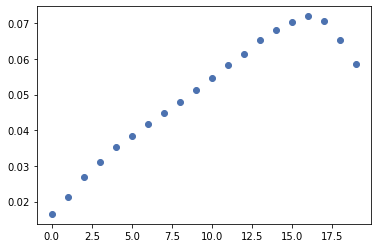

In [125]:
plt.scatter(range(len(centralpark_morning_Pi)), centralpark_morning_Pi)
plt.show()

In [95]:
#transition matrix for central park in the evening
centralpark_evening = get_transition_matrix_rowsum1(get_transition_matrix(evening_time, bike_df_evening_centralPark, 'Central Park S & 6 Ave', num_docks=20))
centralpark_evening

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.494471,0.197472,0.120063,0.090047,0.037915,0.033175,0.014218,0.007899,0.003160,0.000000,0.001580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.151475,0.419571,0.167560,0.101877,0.076408,0.032172,0.028150,0.012064,0.006702,0.002681,0.000000,0.001340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.118203,0.133570,0.369976,0.147754,0.089835,0.067376,0.028369,0.024823,0.010638,0.005910,0.002364,0.000000,0.001182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.068282,0.110132,0.124449,0.344714,0.137665,0.083700,0.062775,0.026432,0.023128,0.009912,0.005507,0.002203,0.000000,0.001101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.037116,0.065748,0.106045,0.119830,0.331919,0.132556,0.080594,0.060445,0.025451,0.022269,0.009544,0.005302,0.002121,0.000000,0.001060,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.024819,0.036194,0.064116,0.103413,0.116856,0.323681,0.129266,0.078594,0.058945,0.024819,0.021717,0.009307,0.005171,0.002068,0.000000,0.001034,0.000000,0.000000,0.000000,0.000000
6,0.015275,0.024440,0.035642,0.063136,0.101833,0.115071,0.318737,0.127291,0.077393,0.058045,0.024440,0.021385,0.009165,0.005092,0.002037,0.000000,0.001018,0.000000,0.000000,0.000000
7,0.009082,0.015136,0.024218,0.035318,0.062563,0.100908,0.114026,0.315843,0.126135,0.076690,0.057518,0.024218,0.021191,0.009082,0.005045,0.002018,0.000000,0.001009,0.000000,0.000000
8,0.003018,0.009054,0.015091,0.024145,0.035211,0.062374,0.100604,0.113682,0.314889,0.125755,0.076459,0.057344,0.024145,0.021127,0.009054,0.005030,0.002012,0.000000,0.001006,0.000000
9,0.006000,0.003000,0.009000,0.015000,0.024000,0.035000,0.062000,0.100000,0.113000,0.313000,0.125000,0.076000,0.057000,0.024000,0.021000,0.009000,0.005000,0.002000,0.000000,0.001000


In [120]:
#stationary distribution of central park in the evening and its histogram
centralpark_evening=np.asarray(centralpark_evening)
transition_matrix_transp = centralpark_evening.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
centralpark_evening_Pi = target_eigenvect / sum(target_eigenvect) 
centralpark_evening_Pi=(centralpark_evening_Pi).real
centralpark_evening_Pi

array([0.06375101, 0.0731677 , 0.07585102, 0.07671741, 0.07390375,
       0.07087938, 0.06668903, 0.06214451, 0.05755049, 0.05290244,
       0.04859652, 0.04450385, 0.04085351, 0.03741222, 0.03416402,
       0.03106581, 0.0279603 , 0.02460664, 0.02054556, 0.01673483])

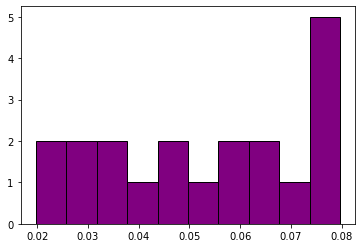

In [121]:
plt.hist(centralpark_evening_Pi, bins=10, align='right', color='purple', edgecolor='black')
plt.show()

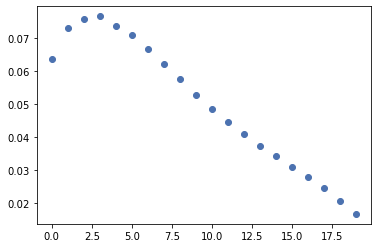

In [122]:
plt.scatter(range(len(centralpark_evening_Pi)), centralpark_evening_Pi)
plt.show()

In [97]:
#transition matrix for BroadwayWest in the morning
BroadwayWest_morning = get_transition_matrix_rowsum1(get_transition_matrix(morning_time, bike_df_morning_broadwayWest, 'Broadway & W 25 St', num_docks=20))
BroadwayWest_morning



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.201681,0.215686,0.162465,0.131653,0.114846,0.074230,0.033613,0.026611,0.014006,0.012605,0.005602,0.001401,0.004202,0.000000,0.001401,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.134545,0.174545,0.186667,0.140606,0.113939,0.099394,0.064242,0.029091,0.023030,0.012121,0.010909,0.004848,0.001212,0.003636,0.000000,0.001212,0.000000,0.000000,0.000000,0.000000
2,0.089404,0.122517,0.158940,0.169978,0.128035,0.103753,0.090508,0.058499,0.026490,0.020971,0.011038,0.009934,0.004415,0.001104,0.003311,0.000000,0.001104,0.000000,0.000000,0.000000
3,0.047319,0.085174,0.116719,0.151420,0.161935,0.121977,0.098843,0.086225,0.055731,0.025237,0.019979,0.010515,0.009464,0.004206,0.001052,0.003155,0.000000,0.001052,0.000000,0.000000
4,0.031568,0.045825,0.082485,0.113035,0.146640,0.156823,0.118126,0.095723,0.083503,0.053971,0.024440,0.019348,0.010183,0.009165,0.004073,0.001018,0.003055,0.000000,0.001018,0.000000
5,0.014056,0.031124,0.045181,0.081325,0.111446,0.144578,0.154618,0.116466,0.094378,0.082329,0.053213,0.024096,0.019076,0.010040,0.009036,0.004016,0.001004,0.003012,0.000000,0.001004
6,0.005000,0.014000,0.031000,0.045000,0.081000,0.111000,0.144000,0.154000,0.116000,0.094000,0.082000,0.053000,0.024000,0.019000,0.010000,0.009000,0.004000,0.001000,0.003000,0.000000
7,0.003984,0.004980,0.013944,0.030876,0.044821,0.080677,0.110558,0.143426,0.153386,0.115538,0.093625,0.081673,0.052789,0.023904,0.018924,0.009960,0.008964,0.003984,0.000996,0.002988
8,0.000998,0.003992,0.004990,0.013972,0.030938,0.044910,0.080838,0.110778,0.143713,0.153693,0.115768,0.093812,0.081836,0.052894,0.023952,0.018962,0.009980,0.008982,0.003992,0.000998
9,0.000000,0.000999,0.003996,0.004995,0.013986,0.030969,0.044955,0.080919,0.110889,0.143856,0.153846,0.115884,0.093906,0.081918,0.052947,0.023976,0.018981,0.009990,0.008991,0.003996


In [118]:
#stationary distribution of BroadwayWest in the morning and its histogram
BroadwayWest_morning=np.asarray(BroadwayWest_morning)
transition_matrix_transp = BroadwayWest_morning.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayWest_morning_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayWest_morning_Pi=(BroadwayWest_morning_Pi).real
BroadwayWest_morning_Pi

array([0.00211059, 0.00314743, 0.00435473, 0.00582453, 0.00766691,
       0.00992779, 0.01271537, 0.01625676, 0.02072072, 0.02643235,
       0.03292411, 0.04196481, 0.05318656, 0.06633491, 0.08270425,
       0.10022602, 0.11597845, 0.13073946, 0.13581323, 0.13097102])

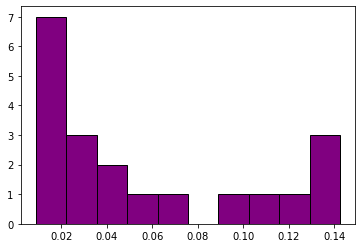

In [117]:
plt.hist(BroadwayWest_morning_Pi, bins=10, align='right', color='purple', edgecolor='black')
plt.show()

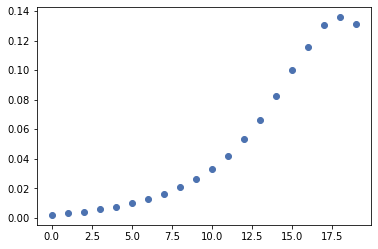

In [119]:
plt.scatter(range(len(BroadwayWest_morning_Pi)), BroadwayWest_morning_Pi)
plt.show()

In [99]:
#transition matrix for BroadwayWest in the evening
BroadwayWest_evening = get_transition_matrix_rowsum1(get_transition_matrix(evening_time, bike_df_evening_broadwayWest, 'Broadway & W 25 St', num_docks=20))
BroadwayWest_evening

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.482890,0.211027,0.133080,0.079848,0.034221,0.032319,0.013308,0.005703,0.003802,0.001901,0.000000,0.000000,0.000000,0.001901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.185759,0.393189,0.171827,0.108359,0.065015,0.027864,0.026316,0.010836,0.004644,0.003096,0.001548,0.000000,0.000000,0.000000,0.001548,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.150000,0.157895,0.334211,0.146053,0.092105,0.055263,0.023684,0.022368,0.009211,0.003947,0.002632,0.001316,0.000000,0.000000,0.000000,0.001316,0.000000,0.000000,0.000000,0.000000
3,0.085439,0.137184,0.144404,0.305656,0.133574,0.084236,0.050542,0.021661,0.020457,0.008424,0.003610,0.002407,0.001203,0.000000,0.000000,0.000000,0.001203,0.000000,0.000000,0.000000
4,0.057823,0.080499,0.129252,0.136054,0.287982,0.125850,0.079365,0.047619,0.020408,0.019274,0.007937,0.003401,0.002268,0.001134,0.000000,0.000000,0.000000,0.001134,0.000000,0.000000
5,0.042345,0.055375,0.077090,0.123779,0.130293,0.275787,0.120521,0.076004,0.045603,0.019544,0.018458,0.007600,0.003257,0.002172,0.001086,0.000000,0.000000,0.000000,0.001086,0.000000
6,0.027455,0.041183,0.053854,0.074974,0.120380,0.126716,0.268215,0.117212,0.073918,0.044351,0.019007,0.017951,0.007392,0.003168,0.002112,0.001056,0.000000,0.000000,0.000000,0.001056
7,0.017653,0.026999,0.040498,0.052960,0.073728,0.118380,0.124611,0.263759,0.115265,0.072690,0.043614,0.018692,0.017653,0.007269,0.003115,0.002077,0.001038,0.000000,0.000000,0.000000
8,0.014330,0.017400,0.026612,0.039918,0.052201,0.072671,0.116684,0.122825,0.259980,0.113613,0.071648,0.042989,0.018424,0.017400,0.007165,0.003071,0.002047,0.001024,0.000000,0.000000
9,0.015121,0.014113,0.017137,0.026210,0.039315,0.051411,0.071573,0.114919,0.120968,0.256048,0.111895,0.070565,0.042339,0.018145,0.017137,0.007056,0.003024,0.002016,0.001008,0.000000


In [116]:
#stationary distribution of BroadwayWest in the evening and its histogram
BroadwayWest_evening=np.asarray(BroadwayWest_evening)
transition_matrix_transp = BroadwayWest_evening.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayWest_evening_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayWest_evening_Pi=(BroadwayWest_evening_Pi).real
BroadwayWest_evening_Pi

array([0.12752201, 0.13210725, 0.12440463, 0.11153727, 0.09469323,
       0.08085065, 0.06704621, 0.05469863, 0.04443168, 0.03581733,
       0.0286464 , 0.02289371, 0.01831448, 0.01493704, 0.01194481,
       0.00949523, 0.00747986, 0.00579863, 0.0042983 , 0.00308263])

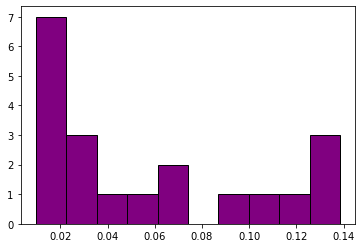

In [113]:
plt.hist(BroadwayWest_evening_Pi, bins=10, align='right', color='purple', edgecolor='black')
plt.show()

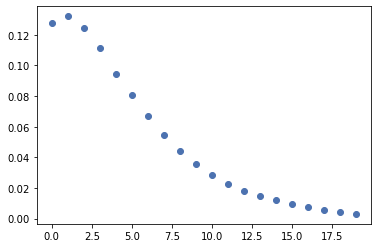

In [114]:
plt.scatter(range(len(BroadwayWest_evening_Pi)), BroadwayWest_evening_Pi)
plt.show()

In [101]:
#transition matrix for BroadwayEest in the morning
BroadwayEast_morning = get_transition_matrix_rowsum1(get_transition_matrix(morning_time, bike_df_morning_broadwayEast, 'Broadway & E 21 St', num_docks=20))
BroadwayEast_morning

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.250358,0.241774,0.177396,0.118741,0.060086,0.045780,0.045780,0.022890,0.012876,0.010014,0.007153,0.000000,0.001431,0.001431,0.001431,0.001431,0.001431,0.000000,0.000000,0.000000
1,0.155797,0.211353,0.204106,0.149758,0.100242,0.050725,0.038647,0.038647,0.019324,0.010870,0.008454,0.006039,0.000000,0.001208,0.001208,0.001208,0.001208,0.001208,0.000000,0.000000
2,0.093100,0.141292,0.191676,0.185104,0.135816,0.090909,0.046002,0.035049,0.035049,0.017525,0.009858,0.007667,0.005476,0.000000,0.001095,0.001095,0.001095,0.001095,0.001095,0.000000
3,0.050936,0.088358,0.134096,0.181913,0.175676,0.128898,0.086279,0.043659,0.033264,0.033264,0.016632,0.009356,0.007277,0.005198,0.000000,0.001040,0.001040,0.001040,0.001040,0.001040
4,0.025355,0.049696,0.086207,0.130832,0.177485,0.171400,0.125761,0.084178,0.042596,0.032454,0.032454,0.016227,0.009128,0.007099,0.005071,0.000000,0.001014,0.001014,0.001014,0.001014
5,0.011044,0.025100,0.049197,0.085341,0.129518,0.175703,0.169679,0.124498,0.083333,0.042169,0.032129,0.032129,0.016064,0.009036,0.007028,0.005020,0.000000,0.001004,0.001004,0.001004
6,0.005994,0.010989,0.024975,0.048951,0.084915,0.128871,0.174825,0.168831,0.123876,0.082917,0.041958,0.031968,0.031968,0.015984,0.008991,0.006993,0.004995,0.000000,0.000999,0.000999
7,0.001996,0.005988,0.010978,0.024950,0.048902,0.084830,0.128743,0.174651,0.168663,0.123752,0.082834,0.041916,0.031936,0.031936,0.015968,0.008982,0.006986,0.004990,0.000000,0.000998
8,0.001994,0.001994,0.005982,0.010967,0.024925,0.048853,0.084746,0.128614,0.174477,0.168495,0.123629,0.082752,0.041874,0.031904,0.031904,0.015952,0.008973,0.006979,0.004985,0.000000
9,0.000000,0.001994,0.001994,0.005982,0.010967,0.024925,0.048853,0.084746,0.128614,0.174477,0.168495,0.123629,0.082752,0.041874,0.031904,0.031904,0.015952,0.008973,0.006979,0.004985


In [112]:
#stationary distribution of BroadwayEast in the morning and its histogram
BroadwayEast_morning=np.asarray(BroadwayEast_morning)
transition_matrix_transp = BroadwayEast_morning.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayEast_morning_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayEast_morning_Pi=(BroadwayEast_morning_Pi).real
BroadwayEast_morning_Pi

array([0.00275484, 0.00409611, 0.00558804, 0.00728753, 0.00925449,
       0.01168932, 0.01475435, 0.01854003, 0.02324774, 0.02911488,
       0.03640391, 0.04542036, 0.05590775, 0.06873889, 0.08312945,
       0.09901295, 0.11398224, 0.12498475, 0.12777542, 0.11831694])

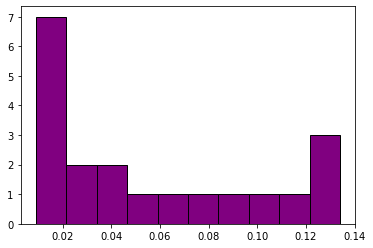

In [109]:
plt.hist(BroadwayEast_morning_Pi, bins=10, align='right', color='purple', edgecolor='black')
plt.show()

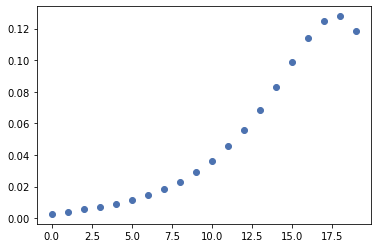

In [111]:
plt.scatter(range(len(BroadwayEast_morning_Pi)), BroadwayEast_morning_Pi)
plt.show()

In [103]:
#transition matrix for BroadwayEest in the evening
BroadwayEast_evening = get_transition_matrix_rowsum1(get_transition_matrix(evening_time, bike_df_evening_broadwayEast, 'Broadway & E 21 St', num_docks=20))
BroadwayEast_evening

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.507194,0.194245,0.133094,0.082734,0.039568,0.026978,0.007194,0.000000,0.005396,0.001799,0.001799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.198847,0.406340,0.155620,0.106628,0.066282,0.031700,0.021614,0.005764,0.000000,0.004323,0.001441,0.001441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.121519,0.174684,0.356962,0.136709,0.093671,0.058228,0.027848,0.018987,0.005063,0.000000,0.003797,0.001266,0.001266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.085648,0.111111,0.159722,0.326389,0.125000,0.085648,0.053241,0.025463,0.017361,0.004630,0.000000,0.003472,0.001157,0.001157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.056769,0.080786,0.104803,0.150655,0.307860,0.117904,0.080786,0.050218,0.024017,0.016376,0.004367,0.000000,0.003275,0.001092,0.001092,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.035789,0.054737,0.077895,0.101053,0.145263,0.296842,0.113684,0.077895,0.048421,0.023158,0.015789,0.004211,0.000000,0.003158,0.001053,0.001053,0.000000,0.000000,0.000000,0.000000
6,0.015544,0.035233,0.053886,0.076684,0.099482,0.143005,0.292228,0.111917,0.076684,0.047668,0.022798,0.015544,0.004145,0.000000,0.003109,0.001036,0.001036,0.000000,0.000000,0.000000
7,0.007202,0.015432,0.034979,0.053498,0.076132,0.098765,0.141975,0.290123,0.111111,0.076132,0.047325,0.022634,0.015432,0.004115,0.000000,0.003086,0.001029,0.001029,0.000000,0.000000
8,0.010183,0.007128,0.015275,0.034623,0.052953,0.075356,0.097760,0.140530,0.287169,0.109980,0.075356,0.046843,0.022403,0.015275,0.004073,0.000000,0.003055,0.001018,0.001018,0.000000
9,0.009082,0.010091,0.007064,0.015136,0.034309,0.052472,0.074672,0.096872,0.139253,0.284561,0.108981,0.074672,0.046418,0.022200,0.015136,0.004036,0.000000,0.003027,0.001009,0.001009


In [108]:
#stationary distribution of BroadwayEast in the evening and its histogram
BroadwayEast_evening=np.asarray(BroadwayEast_evening)
transition_matrix_transp = BroadwayEast_evening.T
eigenvals, eigenvects = np.linalg.eig(transition_matrix_transp)
close_to_1_idx = np.isclose(eigenvals,1)
target_eigenvect = eigenvects[:,close_to_1_idx]
target_eigenvect = target_eigenvect[:,0]
BroadwayEast_evening_Pi = target_eigenvect / sum(target_eigenvect) 
BroadwayEast_evening_Pi=(BroadwayEast_evening_Pi).real
BroadwayEast_evening_Pi

array([0.11937112, 0.1220734 , 0.11788672, 0.10801354, 0.09425472,
       0.08137551, 0.06806031, 0.0560552 , 0.04677878, 0.03856602,
       0.03184419, 0.02600973, 0.02121589, 0.01731285, 0.01409689,
       0.01140047, 0.00911864, 0.00717246, 0.00548935, 0.00390419])

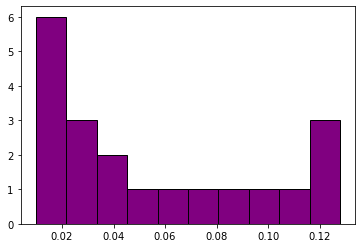

In [107]:
plt.hist(BroadwayEast_evening_Pi, bins=10, align='right', color='purple', edgecolor='black')
plt.show()

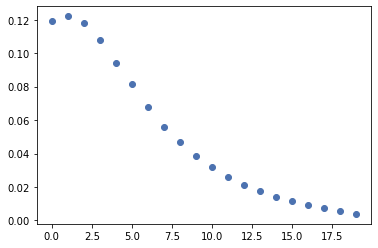

In [106]:
plt.scatter(range(len(BroadwayEast_evening_Pi)), BroadwayEast_evening_Pi)
plt.show()